In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import scanpy as sc

## Load data

In [2]:
joanito_reg = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/3_GeneExpressionAnalysis/SCENIC/reg.csv')
joanito_loom = sc.read('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/3_GeneExpressionAnalysis/SCENIC/pyscenic_output.loom', validate=False)

In [8]:
joanito_loom.obs['RegulonsAUC'] = joanito_loom.obs['RegulonsAUC'].astype('category')
joanito_loom.obs['nGene'] = joanito_loom.obs['nGene'].astype('category')
joanito_loom.obs['nUMI'] = joanito_loom.obs['nUMI'].astype('category')
joanito_loom.var['Regulons'] = joanito_loom.var['Regulons'].astype('category')

AnnData object with n_obs × n_vars = 3490 × 29511
    obs: 'RegulonsAUC', 'nGene', 'nUMI'
    var: 'Regulons'

In [11]:
joanito_loom.var

,Regulons
Gene,
AL627309.1,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
AL627309.5,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
AP006222.2,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
LINC01409,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
FAM87B,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
AC136616.2,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
AC141272.1,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
AC007325.1,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
joanito_AUC_MTX_Z = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/3_GeneExpressionAnalysis/SCENIC/auc_mtx_Z.tsv', sep='\t')
chen_AUC_MTX_Z = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/3_GeneExpressionAnalysis/SCENIC/auc_mtx_Z.tsv', sep='\t')

In [9]:
joanito_AUC_MTX_Z.index = joanito_AUC_MTX_Z['Unnamed: 0']
joanito_AUC_MTX_Z.drop(['Unnamed: 0'], axis=1, inplace=True)
joanito_AUC_MTX_Z.index.name = None 

chen_AUC_MTX_Z.index = chen_AUC_MTX_Z['Unnamed: 0']
chen_AUC_MTX_Z.drop(['Unnamed: 0'], axis=1, inplace=True)
chen_AUC_MTX_Z.index.name = None 

In [179]:
adata_joanito = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.MSI.preprocessed.NanoMnT.ManualAnnot.labeled.h5ad')
adata_chen = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.labeled.h5ad')

In [13]:
chen_patient_metadata = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/Immunotherapy_CRC_Chen_et_al/metadata/Chen_et_al.patient_meta.csv',)

dict_PatientID_to_TumorStage = { list(tup)[1] : list(tup)[7] for tup in chen_patient_metadata.itertuples() }
dict_PatientID_to_TumorRegressionRatio = { list(tup)[1] : list(tup)[12] for tup in chen_patient_metadata.itertuples() }
dict_PatientID_to_Age = { list(tup)[1] : list(tup)[2] for tup in chen_patient_metadata.itertuples() }

adata_chen.obs['TumorStage'] = [ dict_PatientID_to_TumorStage[PID] for PID in adata_chen.obs['PatientID'] ]
adata_chen.obs['TumorRegressionRatio'] = [ dict_PatientID_to_TumorRegressionRatio[PID] for PID in adata_chen.obs['PatientID'] ]
adata_chen.obs['Age'] = [ dict_PatientID_to_Age[PID] for PID in adata_chen.obs['PatientID'] ]

chen_patient_order_by_MSI_intensity     = ['P18', 'P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']
chen_patient_order_by_MSI_intensity_P18 = ['P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']

chen_patient_order_by_MSI_intensity_AC  = ['P26', 'P20', 'P21', 'P04']
chen_patient_order_by_MSI_intensity_TC  = ['P19', 'P22', 'P23',]
chen_patient_order_by_MSI_intensity_SC  = ['P18', 'P17', 'P15']

joanito_patient_order_by_MSI_intensity  = ['CRC2817', 'SC035', 'CRC2783', 'SC044']

In [17]:
dict_PatientID_to_MSI_class = {'CRC2783': 'MSI-I',
 'CRC2817': 'MSI-L',
 'SC035': 'MSI-I',
 'SC044': 'MSI-H',
 'P04': 'MSI-H',
 'P15': 'MSI-I',
 'P17': 'MSI-L',
 'P18': 'MSI-L',
 'P19': 'MSI-I',
 'P20': 'MSI-I',
 'P21': 'MSI-H',
 'P22': 'MSI-I',
 'P23': 'MSI-H',
 'P26': 'MSI-I'}

adata_joanito_tumor.obs['MSI_class'] = [ dict_PatientID_to_MSI_class[PID] for PID in adata_joanito_tumor.obs['PatientID'] ]
adata_chen_tumor.obs['MSI_class'] = [ dict_PatientID_to_MSI_class[PID] for PID in adata_chen_tumor.obs['PatientID'] ]

In [137]:
adata_joanito_tumor = adata_joanito_tumor.raw.to_adata()
sc.pp.normalize_total(adata_joanito_tumor)
sc.pp.log1p(adata_joanito_tumor)

In [138]:
adata_chen_tumor = adata_chen_tumor.raw.to_adata()
sc.pp.normalize_total(adata_chen_tumor)
sc.pp.log1p(adata_chen_tumor)

In [20]:
dict_CB_to_MSI_class = { tup.Index : tup.MSI_class for tup in adata_joanito_tumor.obs.itertuples() }
joanito_AUC_MTX_Z['MSI_class'] = [ dict_CB_to_MSI_class[CB] for CB in joanito_AUC_MTX_Z.index ]

dict_CB_to_MSI_class = { tup.Index : tup.MSI_class for tup in adata_chen_tumor.obs.itertuples() }
chen_AUC_MTX_Z['MSI_class'] = [ dict_CB_to_MSI_class[CB] for CB in chen_AUC_MTX_Z.index ]

In [34]:
chen_AUC_MTX_Z_by_MSI_class = list() 

for MSI_class, edf in chen_AUC_MTX_Z.groupby('MSI_class'):
    for tup in edf.T.itertuples():
        if tup.Index == 'MSI_class': continue
        avg_score = np.mean(list(tup)[1:])
        chen_AUC_MTX_Z_by_MSI_class.append( [MSI_class, tup.Index, avg_score] )
        
chen_AUC_MTX_Z_by_MSI_class = pd.DataFrame(chen_AUC_MTX_Z_by_MSI_class, columns=['MSI_class', 'Regulon', 'AvgScore'])
chen_AUC_MTX_Z_by_MSI_class = chen_AUC_MTX_Z_by_MSI_class.pivot(index='Regulon', columns='MSI_class', values='AvgScore')
chen_AUC_MTX_Z_by_MSI_class = chen_AUC_MTX_Z_by_MSI_class[['MSI-L', 'MSI-I', 'MSI-H']]

<Axes: xlabel='MSI-L', ylabel='Regulon'>

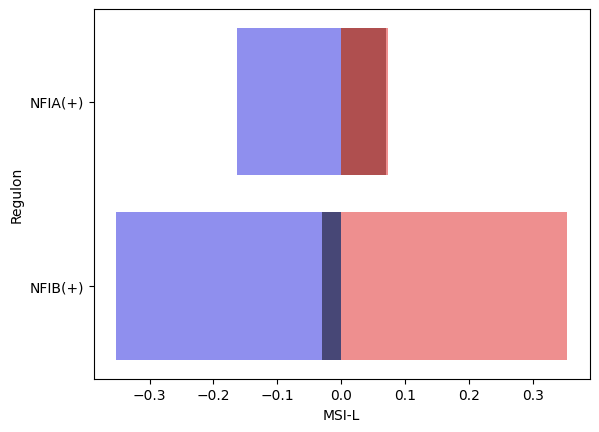

In [57]:
import matplotlib.pyplot as plt 
sns.barplot(data=chen_AUC_MTX_Z_by_MSI_class[chen_AUC_MTX_Z_by_MSI_class.index.isin(['NFIA(+)', 'NFIB(+)'])], y='Regulon', x='MSI-L', color='blue', alpha=0.5,)
sns.barplot(data=chen_AUC_MTX_Z_by_MSI_class[chen_AUC_MTX_Z_by_MSI_class.index.isin(['NFIA(+)', 'NFIB(+)'])], y='Regulon', x='MSI-I', color='black', alpha=0.5,)
sns.barplot(data=chen_AUC_MTX_Z_by_MSI_class[chen_AUC_MTX_Z_by_MSI_class.index.isin(['NFIA(+)', 'NFIB(+)'])], y='Regulon', x='MSI-H', color='red', alpha=0.5,)

In [45]:
joanito_AUC_MTX_Z_by_MSI_class = list() 

for MSI_class, edf in joanito_AUC_MTX_Z.groupby('MSI_class'):
    for tup in edf.T.itertuples():
        if tup.Index == 'MSI_class': continue
        avg_score = np.mean(list(tup)[1:])
        joanito_AUC_MTX_Z_by_MSI_class.append( [MSI_class, tup.Index, avg_score] )
        
joanito_AUC_MTX_Z_by_MSI_class = pd.DataFrame(joanito_AUC_MTX_Z_by_MSI_class, columns=['MSI_class', 'Regulon', 'AvgScore'])
joanito_AUC_MTX_Z_by_MSI_class = joanito_AUC_MTX_Z_by_MSI_class.pivot(index='Regulon', columns='MSI_class', values='AvgScore')
joanito_AUC_MTX_Z_by_MSI_class = joanito_AUC_MTX_Z_by_MSI_class[['MSI-L', 'MSI-I', 'MSI-H']]

<Axes: xlabel='MSI-L', ylabel='Regulon'>

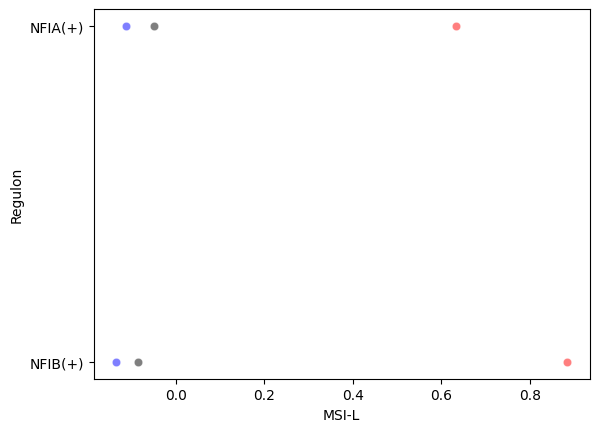

In [58]:
import matplotlib.pyplot as plt 
sns.scatterplot(data=joanito_AUC_MTX_Z_by_MSI_class[joanito_AUC_MTX_Z_by_MSI_class.index.isin(['NFIA(+)', 'NFIB(+)'])], y='Regulon', x='MSI-L', color='blue', alpha=0.5,)
sns.scatterplot(data=joanito_AUC_MTX_Z_by_MSI_class[joanito_AUC_MTX_Z_by_MSI_class.index.isin(['NFIA(+)', 'NFIB(+)'])], y='Regulon', x='MSI-I', color='black', alpha=0.5,)
sns.scatterplot(data=joanito_AUC_MTX_Z_by_MSI_class[joanito_AUC_MTX_Z_by_MSI_class.index.isin(['NFIA(+)', 'NFIB(+)'])], y='Regulon', x='MSI-H', color='red', alpha=0.5,)

<Axes: xlabel='MSI_class', ylabel='NFIA(+)'>

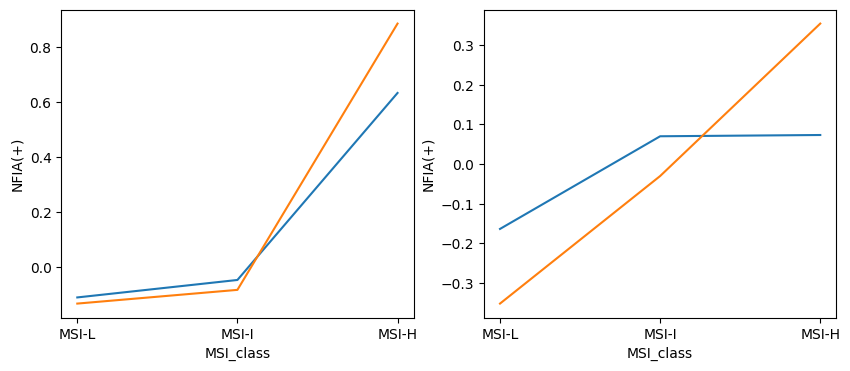

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.lineplot(data=joanito_AUC_MTX_Z_by_MSI_class[joanito_AUC_MTX_Z_by_MSI_class.index.isin(['NFIA(+)', 'NFIB(+)'])].T, x='MSI_class', y='NFIA(+)',ax=axes[0])
sns.lineplot(data=joanito_AUC_MTX_Z_by_MSI_class[joanito_AUC_MTX_Z_by_MSI_class.index.isin(['NFIA(+)', 'NFIB(+)'])].T, x='MSI_class', y='NFIB(+)',ax=axes[0])

sns.lineplot(data=chen_AUC_MTX_Z_by_MSI_class[chen_AUC_MTX_Z_by_MSI_class.index.isin(['NFIA(+)', 'NFIB(+)'])].T, x='MSI_class', y='NFIA(+)',ax=axes[1])
sns.lineplot(data=chen_AUC_MTX_Z_by_MSI_class[chen_AUC_MTX_Z_by_MSI_class.index.isin(['NFIA(+)', 'NFIB(+)'])].T, x='MSI_class', y='NFIB(+)',ax=axes[1])

In [78]:
joanito_reg = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/3_GeneExpressionAnalysis/SCENIC/reg.csv', )
joanito_reg.rename({
    'Unnamed: 0' : 'TF',
    'Unnamed: 1' : 'meta',
}, axis=1, inplace=True)


"[('PRKAG2', 3.3276737108329626), ('NFIB', 2.9430955909584764), ('SHANK2', 4.081970106629729), ('EHBP1', 3.500162096882411), ('AHI1', 3.5565122151374142), ('PATJ', 3.456325502790662), ('ARID1B', 3.4816478371402235), ('SPIDR', 2.788563830939117), ('ANK3', 3.0763250152896537), ('GAB2', 3.4952641600253846), ('RERE', 3.1734612188466875), ('TPCN1', 3.5514465894993066), ('OSBPL1A', 2.991375813757859)]"

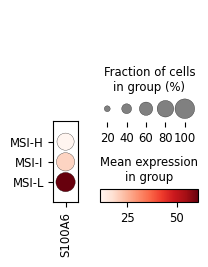

In [93]:
sc.pl.dotplot(adata_chen_tumor, var_names=['S100A6'], groupby='MSI_class')

In [114]:
joanito_adj = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/3_GeneExpressionAnalysis/SCENIC/adj.csv')
chen_adj = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/3_GeneExpressionAnalysis/SCENIC/adj.csv',)

In [ ]:
# S100A1	0.858
# S100A10	-1.613
# S100A11	-1.243
# S100A13	-1.309
# S100A14	-2.048
# S100A16	-1.301
# S100A2	-3.909
# S100A3	-4.749
# S100A4	-2.775
# S100A5	-2.388
# S100A6	-1.959
# S100A8	-1.692
# S100A9	-1.037
# S100P	-1.913
# S100PBP	0.101
# S100Z	1.264

In [101]:
dict_region_to_S100_gene = {
    # '1q21' : [f'S100A{i}' for i in range(1, 18+1)] + ['TCHH', 'FLG', 'RPTN'],
    '1q21' : [f'S100A{i}' for i in range(1, 14+1)] + ['TCHH', 'FLG',],
    '21q22' : ['S100B'],
    'Xp22' : ['S100G'],
    '4p16' : ['S100P'],
    '5q14' : ['S100Z'],
}

dict_region_to_S100_gene = {
    # '1q21' : [f'S100A{i}' for i in range(1, 18+1)] + ['TCHH', 'FLG', 'RPTN'],
    '1q21' : ['S100A2', 'S100A4', 'S100A6', 'S100A2', 'S100A10', 'S100A11', 'S100A13', 'S100A14',],
    '4p16' : ['S100P'],}

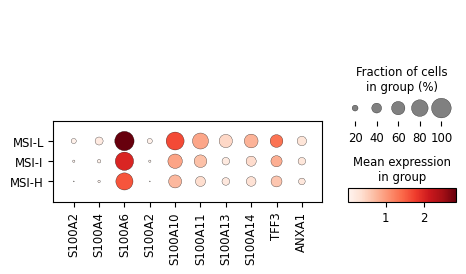

In [141]:
sc.pl.dotplot(adata_chen_tumor, var_names=dict_region_to_S100_gene['1q21']+['TFF3', 'ANXA1'], groupby='MSI_class', categories_order=['MSI-L', 'MSI-I', 'MSI-H'])

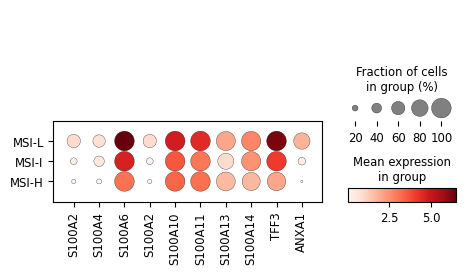

In [140]:
sc.pl.dotplot(adata_joanito_tumor, var_names=dict_region_to_S100_gene['1q21']+['TFF3', 'ANXA1'], groupby='MSI_class', categories_order=['MSI-L', 'MSI-I', 'MSI-H'])

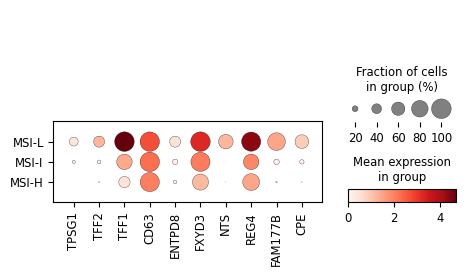

In [139]:
sc.pl.dotplot(adata_joanito_tumor, var_names=list(joanito_adj[(joanito_adj['TF']=='TFF3')].head(10)['target']), groupby='MSI_class', categories_order=['MSI-L', 'MSI-I', 'MSI-H'])

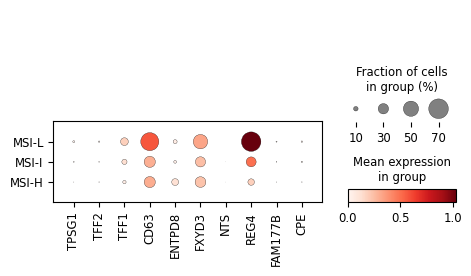

In [142]:
sc.pl.dotplot(adata_chen_tumor, var_names=list(joanito_adj[(joanito_adj['TF']=='TFF3')].head(10)['target']), groupby='MSI_class', categories_order=['MSI-L', 'MSI-I', 'MSI-H'])

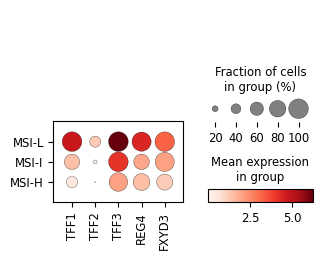

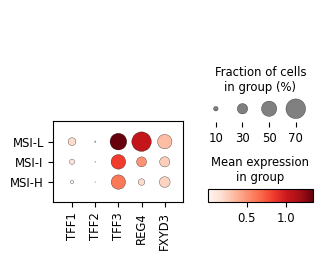

In [147]:
sc.pl.dotplot(adata_joanito_tumor, var_names=['TFF1', 'TFF2', 'TFF3', 'REG4', 'FXYD3'], groupby='MSI_class', categories_order=['MSI-L', 'MSI-I', 'MSI-H'])
sc.pl.dotplot(adata_chen_tumor, var_names=['TFF1', 'TFF2', 'TFF3',  'REG4', 'FXYD3'], groupby='MSI_class', categories_order=['MSI-L', 'MSI-I', 'MSI-H'])

In [112]:
joanito_adj[(joanito_adj['target'].isin(['S100A2', 'S100A4', 'S100A6', 'S100A2', 'S100A10', 'S100A11', 'S100A13', 'S100A14',]))].sort_values('importance', ascending=False)

,TF,target,importance
366,TFF3,S100A6,6.404211
1703,ANXA1,S100A10,4.740804
3060,EZR,S100A11,4.193992
7663,ZNF706,S100A13,3.368199
7773,ANXA1,S100A6,3.356334
...,...,...,...
2159870,ISL1,S100A4,0.002503
2159895,CHD2,S100A2,0.002499
2160364,JUNB,S100A4,0.002407
2160614,UBP1,S100A2,0.002347


In [151]:
joanito_adj[(joanito_adj['TF'].isin(['TFF3',]))].sort_values('importance', ascending=False).head(20)

,TF,target,importance
10,TFF3,TPSG1,11.921086
20,TFF3,TFF2,10.982451
40,TFF3,TFF1,9.720069
64,TFF3,CD63,8.919138
83,TFF3,ENTPD8,8.452981
85,TFF3,FXYD3,8.439008
115,TFF3,NTS,7.900499
123,TFF3,REG4,7.829238
146,TFF3,FAM177B,7.580883
194,TFF3,CPE,7.203473


In [152]:
chen_adj[(chen_adj['TF'].isin(['TFF3',]))].sort_values('importance', ascending=False).head(20)

,TF,target,importance
307,TFF3,JSRP1,9.366817
326,TFF3,SPINK4,9.178391
507,TFF3,TNNC2,7.917532
648,TFF3,GSN,7.332934
665,TFF3,HES2,7.290883
685,TFF3,STARD10,7.246069
714,TFF3,TPM1,7.127879
724,TFF3,NPW,7.109440
819,TFF3,CDC42EP5,6.846964
913,TFF3,BCAS1,6.674865


In [124]:
dict_TF_to_S100_associations = dict() 
for TF, edf in chen_adj[(chen_adj['target'].isin(['S100A2', 'S100A4', 'S100A6', 'S100A2', 'S100A10', 'S100A11', 'S100A13', 'S100A14',]))].groupby('TF'):
    dict_TF_to_S100_associations[TF] = [ int(len(edf)), np.mean(edf['importance']) ]
chen_TF_to_S100_associations = pd.DataFrame(dict_TF_to_S100_associations).T
chen_TF_to_S100_associations.columns = ['n', 'importance']
chen_TF_to_S100_associations.sort_values('n', ascending=False, inplace=True)
chen_TF_to_S100_associations[(chen_TF_to_S100_associations['importance']>=1)].head(10)

,n,importance
UQCRB,7.0,2.951449
SOD1,7.0,1.044666
RPL6,7.0,1.829565
RPL35,7.0,3.211444
PKM,7.0,1.558575
RPS4X,6.0,1.521207
HNRNPA1,6.0,1.052431
GTF2A2,6.0,1.196452
PSMA6,6.0,1.540182
HMGA1,5.0,1.043448


In [125]:
dict_TF_to_S100_associations = dict() 
for TF, edf in joanito_adj[(joanito_adj['target'].isin(['S100A2', 'S100A4', 'S100A6', 'S100A2', 'S100A10', 'S100A11', 'S100A13', 'S100A14',]))].groupby('TF'):
    dict_TF_to_S100_associations[TF] = [ int(len(edf)), np.mean(edf['importance']) ]
joanito_TF_to_S100_associations = pd.DataFrame(dict_TF_to_S100_associations).T
joanito_TF_to_S100_associations.columns = ['n', 'importance']
joanito_TF_to_S100_associations.sort_values('n', ascending=False, inplace=True)
joanito_TF_to_S100_associations[(joanito_TF_to_S100_associations['importance']>=1)].head(10)

,n,importance
TFF3,7.0,1.497808
ANXA1,7.0,2.108177
EZR,6.0,1.890503
CD59,6.0,1.378357
AHR,6.0,1.214130
PHLDA2,5.0,2.013114
ELF3,5.0,1.047016
HOXB2,5.0,1.239321
ZNF706,5.0,1.504587
ANXA11,3.0,1.197297


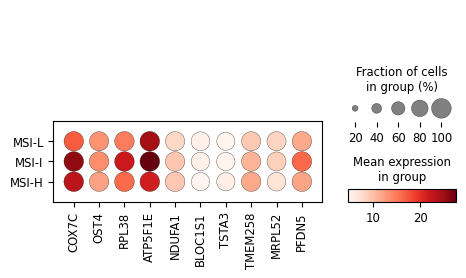

In [135]:
sc.pl.dotplot(adata_joanito_tumor, var_names=list(joanito_adj[(joanito_adj['TF']=='UQCRB')].head(10)['target']), groupby='MSI_class', categories_order=['MSI-L', 'MSI-I', 'MSI-H'])

In [155]:
sc.pp.highly_variable_genes(adata_chen_tumor, n_top_genes=2000, batch_key="PatientID")
adata_chen_tumor.raw = adata_chen_tumor
adata_chen_tumor = adata_chen_tumor[:, adata_chen_tumor.var.highly_variable]

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


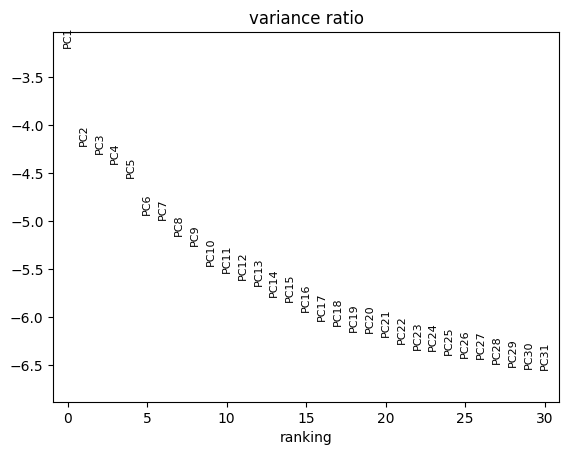

In [156]:
sc.pp.scale(adata_chen_tumor, max_value=10)
sc.tl.pca(adata_chen_tumor, svd_solver="arpack")
sc.pl.pca_variance_ratio(adata_chen_tumor, log=True)

In [157]:
sc.pp.neighbors(adata_chen_tumor, n_neighbors=15, n_pcs=40)
sc.tl.umap(adata_chen_tumor,)

2025-02-23 18:41:22.083702: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-23 18:41:22.123772: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-23 18:41:22.643332: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-23 18:41:22.788854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-23 18:41:22.976713: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

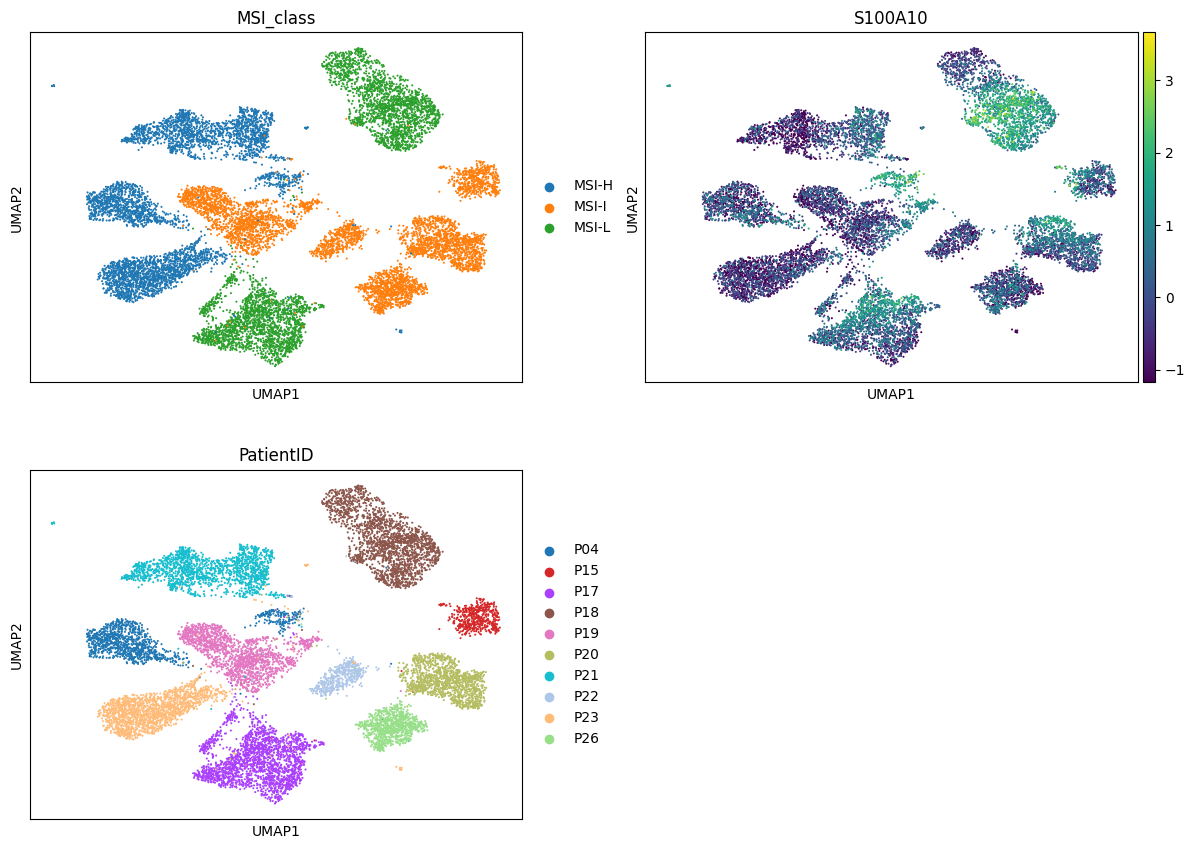

In [178]:
sc.pl.umap(adata_chen_tumor, color=['MSI_class', 'S100A10', 'PatientID'], ncols=2)

In [176]:
sc.tl.rank_genes_groups(adata_chen_tumor, groupby='PatientID', )

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value enco

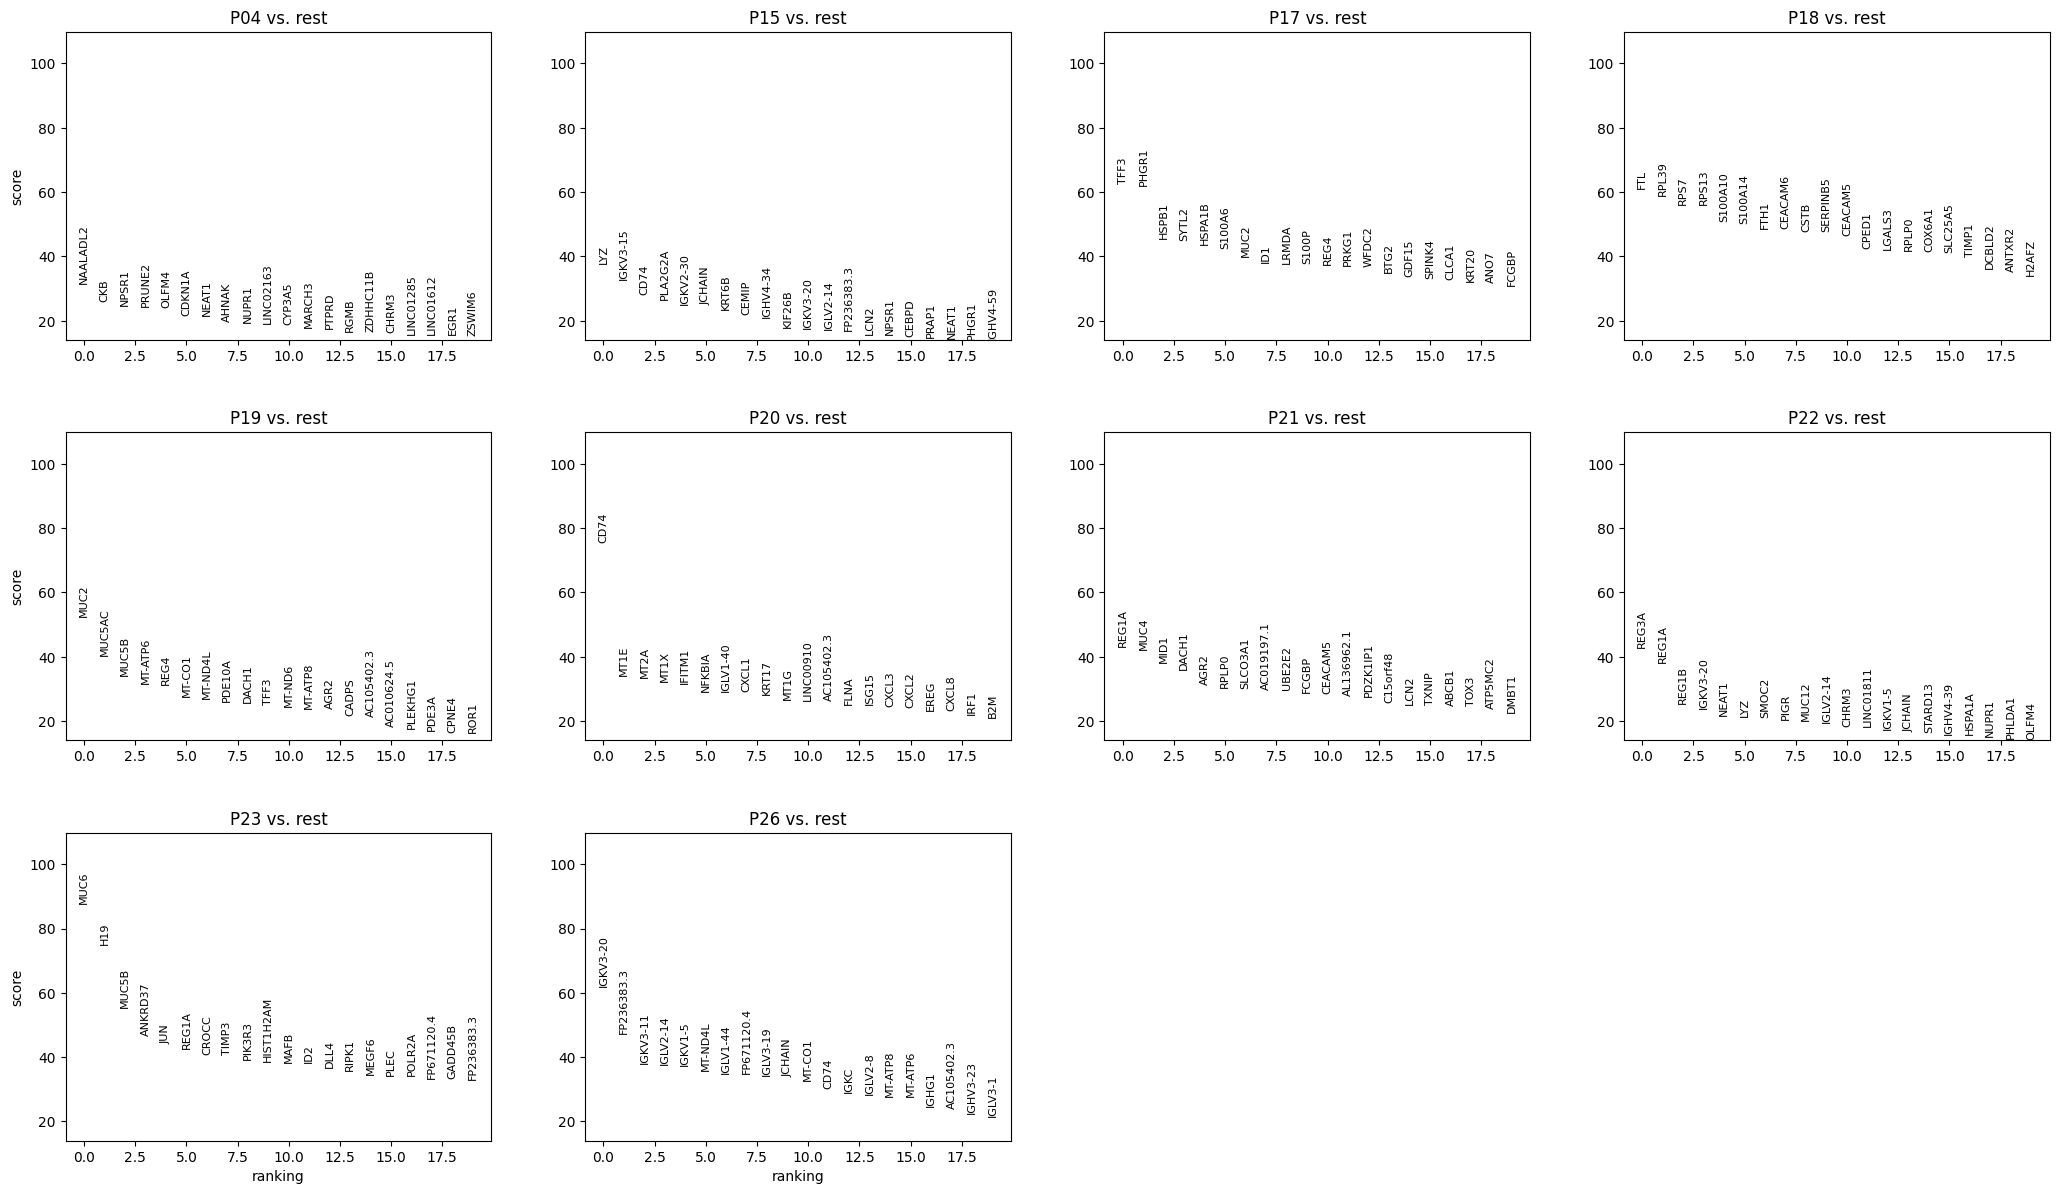

In [177]:
sc.pl.rank_genes_groups(adata_chen_tumor, groupby='PatientID', )